In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import os

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential 
#from tensorflow.keras.layers import MaxPool2D, Conv2D, Dropout, BatchNormalization
import numpy as np
from glob import glob

In [4]:
! git clone https://github.com/DeyonOba/Hamoye_capstone_project_smote.git

Cloning into 'Hamoye_capstone_project_smote'...
remote: Enumerating objects: 11013, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 11013 (delta 82), reused 221 (delta 67), pack-reused 10768
Receiving objects: 100% (11013/11013), 431.28 MiB | 16.74 MiB/s, done.
Resolving deltas: 100% (87/87), done.
Checking out files: 100% (10831/10831), done.


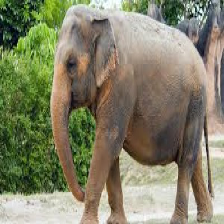

In [5]:
img = load_img("/content/Hamoye_capstone_project_smote/Data/train/Elephant/Elephant_181.jpg", target_size=(224,224))
img

In [6]:
folder = glob("/content/Hamoye_capstone_project_smote/Data/train")

In [7]:
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications.resnet import decode_predictions

In [8]:
model = ResNet152(weights='imagenet')

242909184/242900224 [==============================] - 10s 0us/step


In [9]:
#transfer learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [10]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
train_ds = train_gen.flow_from_directory(
"/content/Hamoye_capstone_project_smote/Data/train", target_size =(150,150),
     batch_size=32,
     seed=2022,
     shuffle=True,
     class_mode='categorical'
      )

Found 7556 images belonging to 4 classes.


In [12]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    "/content/Hamoye_capstone_project_smote/Data/val",
    target_size =(150,150),
     batch_size=32,
     seed=2022,
     class_mode = 'categorical',
     shuffle = False
      )

Found 2160 images belonging to 4 classes.


In [13]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator=test_datagen.flow_from_directory(
   "/content/Hamoye_capstone_project_smote/Data/test",
    target_size=(150,150),
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical")

Found 1084 images belonging to 4 classes.


In [14]:
#create a base model
 #our base model is ResNet152
base_model = ResNet152(weights = 'imagenet',
                       include_top = False,
                       input_shape = (150,150,3),
                       classes = 4,
                       classifier_activation='softmax'
                       )
base_model.trainable=False

234708992/234698864 [==============================] - 9s 0us/step


Model Creation

In [15]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 26.8 MB/s 


In [16]:
import tensorflow_addons as tfa

In [17]:
import keras
from keras import Sequential
from keras.layers import Dense,Flatten



np.random.seed(2022)
tf.random.set_seed(2022)

model = Sequential([
    base_model
])
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = ['accuracy', tfa.metrics.F1Score(num_classes=4)])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 5, 5, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 4)                 204804    
                                                                 
Total params: 58,575,748
Trainable params: 204,804
Non-trainable params: 58,370,944
_________________________________________________________________


In [18]:

EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4)
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, cooldown=0, min_lr=1e-7, verbose=1)
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/ResNet152.h5', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')


In [19]:
history = model.fit(train_ds, epochs=5, validation_data = val_ds)

Epoch 1/5
237/237 [==============================] - 67s 197ms/step - loss: 0.2678 - accuracy: 0.9252 - f1_score: 0.9253 - val_loss: 0.1688 - val_accuracy: 0.9593 - val_f1_score: 0.9593
Epoch 2/5
237/237 [==============================] - 45s 189ms/step - loss: 0.0212 - accuracy: 0.9925 - f1_score: 0.9925 - val_loss: 0.1324 - val_accuracy: 0.9676 - val_f1_score: 0.9677
Epoch 3/5
237/237 [==============================] - 45s 188ms/step - loss: 0.0068 - accuracy: 0.9978 - f1_score: 0.9978 - val_loss: 0.1069 - val_accuracy: 0.9769 - val_f1_score: 0.9769
Epoch 4/5
237/237 [==============================] - 45s 190ms/step - loss: 0.0022 - accuracy: 0.9996 - f1_score: 0.9996 - val_loss: 0.0989 - val_accuracy: 0.9815 - val_f1_score: 0.9815
Epoch 5/5
237/237 [==============================] - 45s 191ms/step - loss: 0.0017 - accuracy: 0.9997 - f1_score: 0.9997 - val_loss: 0.0999 - val_accuracy: 0.9819 - val_f1_score: 0.9820


In [23]:
score = model.evaluate(test_generator)

34/34 [==============================] - 6s 157ms/step - loss: 0.0653 - accuracy: 0.9815 - f1_score: 0.9816


In [30]:
score

[0.06525203585624695,
 0.9815497994422913,
 array([0.9778598 , 0.970696  , 0.9795158 , 0.99815834], dtype=float32)]

the model was able to predict 
Buffalo to 97%
Elephant to 97%
Rhino to97%
zebra to 99%

In [31]:
labels = ['buffalo', 'elephant', 'rhino','zebra']
pred = model.predict(test_generator) 
pred = np.argmax(pred, axis = 1)[:20] 


print(pred) 


[1 1 0 2 0 2 3 1 2 3 2 0 3 1 0 0 1 1 2 1]


In [21]:
#saving model as .pkl
import pickle
pickle.dump(ResNet152,
            open('ResNet152_98.pkl','wb'))

In [22]:
#saving model as .hdf5
model.save('ResNet152.hdf5')